In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
titanic = pd.read_csv("https://learnenough.s3.amazonaws.com/titanic.csv")

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
dropped_columns = ["PassengerId", "Name", "Cabin", "Embarked",
                   "SibSp", "Parch", "Ticket", "Fare"]

for column in dropped_columns:
    titanic = titanic.drop(column, axis=1)

In [51]:
titanic.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [52]:
for column in ["Age", "Sex", "Pclass"]:
    titanic = titanic[titanic[column].notna()]

In [53]:
sexes = {"male": 0, "female": 1}
titanic["Sex"] = titanic["Sex"].map(sexes)

In [54]:
X = titanic.drop("Survived", axis=1)
Y = titanic["Survived"]

In [55]:
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, random_state=1)

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
accuracy_logreg = logreg.score(X_test, Y_test)

In [57]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
accuracy_naive_bayes = naive_bayes.score(X_test, Y_test)

In [58]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
accuracy_perceptron = perceptron.score(X_test, Y_test)

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
accuracy_decision_tree = decision_tree.score(X_test, Y_test)

In [60]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, Y_train)
accuracy_random_forest = random_forest.score(X_test, Y_test)

In [61]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Perceptron",
              "Decision Tree", "Random Forest"],
    "Score": [accuracy_logreg, accuracy_naive_bayes, accuracy_perceptron,
              accuracy_decision_tree, accuracy_random_forest]})
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df

,Model
Score,
0.854749,Decision Tree
0.854749,Random Forest
0.787709,Logistic Regression
0.770950,Naive Bayes
0.743017,Perceptron


In [62]:
 random_forest.feature_importances_

array([0.16946036, 0.35821155, 0.47232809])

In [63]:
 X_train.columns

Index(['Pclass', 'Sex', 'Age'], dtype='object')

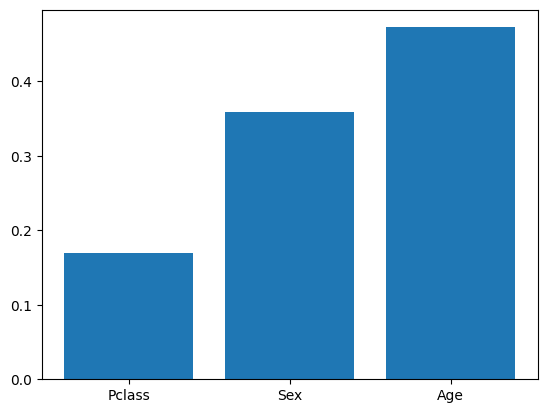

In [64]:
fig, ax = plt.subplots()
ax.bar(X_train.columns, random_forest.feature_importances_)
plt.show()

In [65]:
 from sklearn.model_selection import cross_val_score

In [66]:
random_forest = RandomForestClassifier(random_state=1)
scores = cross_val_score(random_forest, X, Y)
scores

array([0.75524476, 0.8041958 , 0.82517483, 0.83216783, 0.83098592])

In [67]:
scores.mean()

0.8095538264552349

In [69]:
scores.std()

0.028958338744358988